In [28]:
# This is a Bayesian Neural Network implementation using TensorFlow for a simple y = sin(x) function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
# Check if GPU is available
print("GPU Available: ", tf.test.is_gpu_available())
print("GPU Name: ", tf.test.gpu_device_name())

GPU Available:  True
GPU Name:  /device:GPU:0


N:  5000
T:  200
[0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071]
[0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531
 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531
 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531
 0.16326531 0.16326531]
XX:  (500, 20)
YY:  (500, 20)


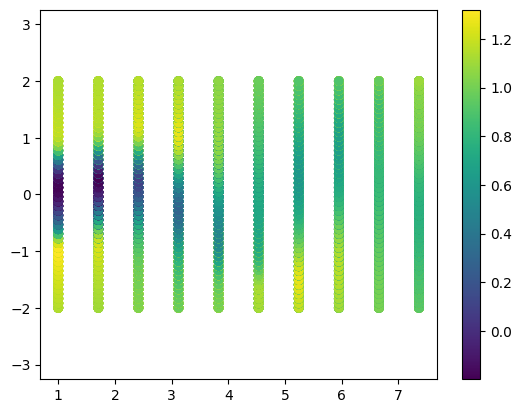

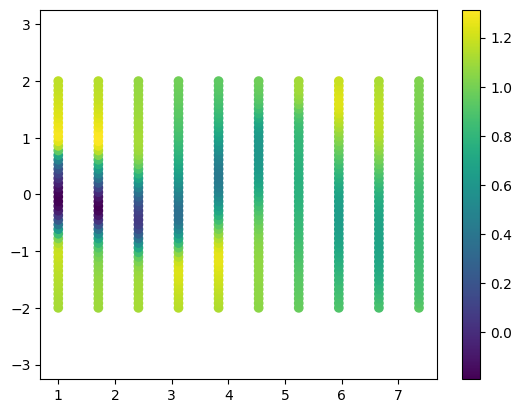

(500, 3)
x min:  1.0
x max:  7.363636363636363
y min:  -2.0
y max:  2.0


In [30]:
import numpy as np
import scipy.io
# Load Data
data = scipy.io.loadmat('cylinder_nektar_wake.mat')
        
nu = 1/100
U_star = data['U_star'] # N x 2 x T
P_star = data['p_star'] # N x T
t_star = data['t'] # T x 1
X_star = data['X_star'] # N x 2

N = X_star.shape[0]
T = t_star.shape[0]
print("N: ", N)
print("T: ", T)

# Rearrange Data 
XX = np.tile(X_star[:,0:1], (1,T)) # N x T
YY = np.tile(X_star[:,1:2], (1,T)) # N x T
TT = np.tile(t_star, (1,N)).T # N x T

UU = U_star[:,0,:] # N x T
VV = U_star[:,1,:] # N x T
PP = P_star # N x T

# Take every step-th of XX, YY, TT, UU, VV, PP
step = 10
XX = XX[::step,::step] # N/step x T/step
YY = YY[::step,::step]
TT = TT[::step,::step]
UU = UU[::step,::step]
VV = VV[::step,::step]
PP = PP[::step,::step]

print(XX[1]-XX[0])
print(YY[20]-YY[0])
print('XX: ',XX.shape)
print('YY: ',YY.shape)

x = XX.flatten()[:,None] # NT x 1
y = YY.flatten()[:,None] # NT x 1
t = TT.flatten()[:,None] # NT x 1

u = UU.flatten()[:,None] # NT x 1
v = VV.flatten()[:,None] # NT x 1
p = PP.flatten()[:,None] # NT x 1

# Plot scatter of x y u
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, c=u)
plt.colorbar()
plt.axis('equal')
plt.show()

# Plot for first time step using XX, YY, UU
timestep = 11
plt.figure()
plt.scatter(XX[:,timestep], YY[:,timestep], c=UU[:,timestep])    
plt.colorbar()
plt.axis('equal')
plt.show()

# u0, v0, p0 are the initial conditions
u0 = UU[:,0:1]
v0 = VV[:,0:1]
p0 = PP[:,0:1]

initial_data = np.concatenate([u0, v0, p0], 1)
print(initial_data.shape)

# Print min and max of x and y
print("x min: ", np.min(x))
print("x max: ", np.max(x))
print("y min: ", np.min(y))
print("y max: ", np.max(y))

(20, 500, 3)
(20, 500, 3)
(500, 3)
(500, 3)


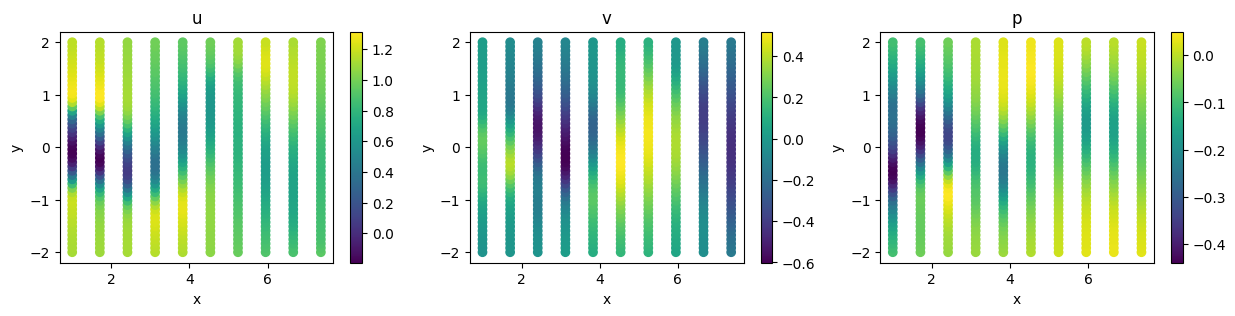

In [31]:
# Create training data for selected timestep only
timestep = 11
X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1], TT[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
Y_tf = np.concatenate([UU[:,timestep:timestep+1], VV[:,timestep:timestep+1], PP[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
#X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3

# Create 3D matrix for time snapshots
X_tf_3D = np.zeros((TT.shape[1], XX.shape[0], 3), dtype=np.float32)
Y_tf_3D = np.zeros((TT.shape[1], XX.shape[0], 3), dtype=np.float32)

for timestep in range(TT.shape[1]):
    X_tf_3D[timestep] = np.concatenate([XX[:, timestep:timestep+1], YY[:, timestep:timestep+1], TT[:, timestep:timestep+1]], 1).astype(np.float32)
    Y_tf_3D[timestep] = np.concatenate([UU[:, timestep:timestep+1], VV[:, timestep:timestep+1], PP[:, timestep:timestep+1]], 1).astype(np.float32)


print(X_tf_3D.shape)
print(Y_tf_3D.shape)

print(X_tf.shape)
print(Y_tf.shape)

# Plot scatter of training date for u, v and p for selected timestep, in 3 subplots
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
sc0 = axs[0].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,0])
axs[0].set_title('u')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(sc0, ax=axs[0])
sc1 = axs[1].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,1])
axs[1].set_title('v')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(sc1, ax=axs[1])
sc2 = axs[2].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,2])
axs[2].set_title('p')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(sc2, ax=axs[2])
plt.show()

In [32]:
dx = np.diff(x, axis=0, prepend=x[0:1])
print(dx.shape)
xE = np.roll(XX[:5], -1, axis=0)
xW = np.roll(XX[:5], 1, axis=0)
print(xE.shape)
print(xE)
print(XX[:5].shape)
print(XX[:5])
print(xW)
print(xW.shape)

(10000, 1)
(5, 20)
[[1.70707071 1.70707071 1.70707071 1.70707071 1.70707071 1.70707071
  1.70707071 1.70707071 1.70707071 1.70707071 1.70707071 1.70707071
  1.70707071 1.70707071 1.70707071 1.70707071 1.70707071 1.70707071
  1.70707071 1.70707071]
 [2.41414141 2.41414141 2.41414141 2.41414141 2.41414141 2.41414141
  2.41414141 2.41414141 2.41414141 2.41414141 2.41414141 2.41414141
  2.41414141 2.41414141 2.41414141 2.41414141 2.41414141 2.41414141
  2.41414141 2.41414141]
 [3.12121212 3.12121212 3.12121212 3.12121212 3.12121212 3.12121212
  3.12121212 3.12121212 3.12121212 3.12121212 3.12121212 3.12121212
  3.12121212 3.12121212 3.12121212 3.12121212 3.12121212 3.12121212
  3.12121212 3.12121212]
 [3.82828283 3.82828283 3.82828283 3.82828283 3.82828283 3.82828283
  3.82828283 3.82828283 3.82828283 3.82828283 3.82828283 3.82828283
  3.82828283 3.82828283 3.82828283 3.82828283 3.82828283 3.82828283
  3.82828283 3.82828283]
 [1.         1.         1.         1.         1.         1.
  1. 

In [33]:
print(YY[20] - YY[0])
print(XX[1]-XX[0])

[0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531
 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531
 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531
 0.16326531 0.16326531]
[0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071]


In [34]:
def a_pinn(model, input_data, t, output_data, nu):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(input_data) 
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(input_data)

            x = input_data[:,0:1]
            y = input_data[:,1:2]
            #t = input_data[:,2:3]

            u = model.forward(tf.concat([x,y], axis=1))[:,0:1]
            v = model.forward(tf.concat([x,y], axis=1))[:,1:2]
            p = model.forward(tf.concat([x,y], axis=1))[:,2:3]

            # Convert u v p to float64
            u = tf.cast(u, tf.float32)
            v = tf.cast(v, tf.float32)
            p = tf.cast(p, tf.float32)
            
        # 1st order
        u_x = tape.gradient(u, x)
        v_x = tape.gradient(v, x)
        p_x = tape.gradient(p, x)
        u_y = tape.gradient(u, y)
        v_y = tape.gradient(v, y)
        p_y = tape.gradient(p, y)
        #u_t = tape.gradient(u, t)
        #v_t = tape.gradient(v, t)
        #p_t = tape.gradient(p, t)
    
    # 2nd order
    u_xx = tape2.gradient(u_x, x)
    v_xx = tape2.gradient(v_x, x)
    p_xx = tape2.gradient(p_x, x)
    u_yy = tape2.gradient(u_y, y)
    v_yy = tape2.gradient(v_y, y)
    p_yy = tape2.gradient(p_y, y)
    
    # Compute residual
    f_u = u*u_x + v*u_y + p_x - 1/500*(u_xx + u_yy)
    f_v = u*v_x + v*v_y + p_y - 1/500*(v_xx + v_yy)
    f_p = u_x + v_y

    residual = tf.reduce_mean(tf.square(f_u)) + tf.reduce_mean(tf.square(f_v)) + tf.reduce_mean(tf.square(f_p))

    return residual

def at_pinn(model, input_data, t, output_data, nu):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(input_data) 
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(input_data)

            x = input_data[:,0:1]
            y = input_data[:,1:2]
            t = input_data[:,2:3]

            u = model.forward(tf.concat([x,y,t], axis=1))[:,0:1]
            v = model.forward(tf.concat([x,y,t], axis=1))[:,1:2]
            p = model.forward(tf.concat([x,y,t], axis=1))[:,2:3]

            # Convert u v p to float64
            u = tf.cast(u, tf.float32)
            v = tf.cast(v, tf.float32)
            p = tf.cast(p, tf.float32)
            
        # 1st order
        u_x = tape.gradient(u, x)
        v_x = tape.gradient(v, x)
        p_x = tape.gradient(p, x)
        u_y = tape.gradient(u, y)
        v_y = tape.gradient(v, y)
        p_y = tape.gradient(p, y)
        u_t = tape.gradient(u, t)
        v_t = tape.gradient(v, t)
        p_t = tape.gradient(p, t)
    
    # 2nd order
    u_xx = tape2.gradient(u_x, x)
    v_xx = tape2.gradient(v_x, x)
    p_xx = tape2.gradient(p_x, x)
    u_yy = tape2.gradient(u_y, y)
    v_yy = tape2.gradient(v_y, y)
    p_yy = tape2.gradient(p_y, y)
    
    # Compute residual
    f_u = u_t + u*u_x + v*u_y + p_x - 1/500*(u_xx + u_yy)
    f_v = v_t + u*v_x + v*v_y + p_y - 1/500*(v_xx + v_yy)
    f_p = u_x + v_y - p_t

    residual = tf.reduce_mean(tf.square(f_u)) + tf.reduce_mean(tf.square(f_v)) + tf.reduce_mean(tf.square(f_p))

    return residual

def n_pinn(model, input_data, t, output_data, nu, scheme):
    x = input_data[:, 0:1]
    y = input_data[:, 1:2]
    #t = input_data[:, 2:1]

    dx = x[1] - x[0]  # Assuming uniform grid
    dy = y[19] - y[0]  # Assuming uniform grid
    xE, xW = x + dx, x - dx
    yN, yS = y + dy, y - dy
    u = model.forward(tf.concat([x,y], axis=1))[:,0:1]
    v = model.forward(tf.concat([x,y], axis=1))[:,1:2]
    p = model.forward(tf.concat([x,y], axis=1))[:,2:3]
    uE, uW = model.forward(tf.concat([xE, y], axis=1))[:, 0:1], model.forward(tf.concat([xW, y], axis=1))[:, 0:1]
    vE, vW = model.forward(tf.concat([xE, y], axis=1))[:, 1:2], model.forward(tf.concat([xW, y], axis=1))[:, 1:2]
    pE, pW = model.forward(tf.concat([xE, y], axis=1))[:, 2:3], model.forward(tf.concat([xW, y], axis=1))[:, 2:3]
    uN, uS = model.forward(tf.concat([x, yN], axis=1))[:, 0:1], model.forward(tf.concat([x, yS], axis=1))[:, 0:1]
    vN, vS = model.forward(tf.concat([x, yN], axis=1))[:, 1:2], model.forward(tf.concat([x, yS], axis=1))[:, 1:2]
    pN, pS = model.forward(tf.concat([x, yN], axis=1))[:, 2:3], model.forward(tf.concat([x, yS], axis=1))[:, 2:3]

    if scheme == 'uw1':
        u_x = (u - uW) / (x - xW)
        u_y = (u - uS) / (y - yS)
        v_x = (v - vW) / (x - xW)
        v_y = (v - vS) / (y - yS)
        p_x = (p - pW) / (x - xW)
        p_y = (p - pS) / (y - yS)
        u_xx = (uE - 2 * u + uW) / (x - xW)**2
        u_yy = (uN - 2 * u + uS) / (y - yS)**2
        v_xx = (vE - 2 * v + vW) / (x - xW)**2
        v_yy = (vN - 2 * v + vS) / (y - yS)**2
    elif scheme == 'uw2':
        uEE = model.forward(tf.concat([x + 2.0 * dx, y], axis=1))[:, 0:1]
        uWW = model.forward(tf.concat([x - 2.0 * dx, y], axis=1))[:, 0:1]
        uNN = model.forward(tf.concat([x, y + 2.0 * dy], axis=1))[:, 0:1]
        uSS = model.forward(tf.concat([x, y - 2.0 * dy], axis=1))[:, 0:1]
        vEE = model.forward(tf.concat([x + 2.0 * dx, y], axis=1))[:, 1:2]
        vWW = model.forward(tf.concat([x - 2.0 * dx, y], axis=1))[:, 1:2]
        vNN = model.forward(tf.concat([x, y + 2.0 * dy], axis=1))[:, 1:2]
        vSS = model.forward(tf.concat([x, y - 2.0 * dy], axis=1))[:, 1:2]
        pWW = model.forward(tf.concat([x - 2.0 * dx, y], axis=1))[:, 2:3]
        pNN = model.forward(tf.concat([x, y + 2.0 * dy], axis=1))[:, 2:3]
        pSS = model.forward(tf.concat([x, y - 2.0 * dy], axis=1))[:, 2:3]
        u_x = (3 * u - 4 * uW + uWW) / (2 * dx)
        u_y = (3 * u - 4 * uS + uSS) / (2 * dy)
        v_x = (3 * v - 4 * vW + vWW) / (2 * dx)
        v_y = (3 * v - 4 * vS + vSS) / (2 * dy)
        p_x = (pE - pW) / (2 * dx)
        p_y = (pN - pS) / (2 * dy)
        u_xx = (-uE + 4 * u - 5 * u + 2 * uW) / dx**2
        u_yy = (-uN + 4 * u - 5 * u + 2 * uS) / dy**2
        v_xx = (-vE + 4 * v - 5 * v + 2 * vW) / dx**2
        v_yy = (-vN + 4 * v - 5 * v + 2 * vS) / dy**2

    # Compute residual
    f_u = u*u_x + v*u_y + p_x - 1/500*(u_xx + u_yy)
    f_v = u*v_x + v*v_y + p_y - 1/500*(v_xx + v_yy)
    f_p = u_x + v_y

    residual = tf.reduce_mean(tf.square(f_u)) + tf.reduce_mean(tf.square(f_v)) + tf.reduce_mean(tf.square(f_p))

    return residual

def nt_pinn(model, input_data, t, output_data, nu, scheme):
    x = input_data[:, 0:1]
    y = input_data[:, 1:2]
    t = input_data[:, 2:3]

    #xE, xW = np.roll(x, -1, axis=0), np.roll(x, -1, axis=0)
    #yN, yS = np.roll(y, -1, axis=0), np.roll(y, -1, axis=0)
    #dx = (xE - xW) / 2
    #dy = (yN - yS) / 2
    dx = 0.707#x[1] - x[0]  # Assuming uniform grid
    dy = 0.16326  # Assuming uniform grid
    xE, xW = x + dx, x - dx
    yN, yS = y + dy, y - dy
    
    u = model.forward(tf.concat([x, y, t], axis=1))[:, 0:1]
    v = model.forward(tf.concat([x, y, t], axis=1))[:, 1:2]
    p = model.forward(tf.concat([x, y, t], axis=1))[:, 2:3]
    uE, uW = model.forward(tf.concat([xE, y, t], axis=1))[:, 0:1], model.forward(tf.concat([xW, y, t], axis=1))[:, 0:1]
    vE, vW = model.forward(tf.concat([xE, y, t], axis=1))[:, 1:2], model.forward(tf.concat([xW, y, t], axis=1))[:, 1:2]
    pE, pW = model.forward(tf.concat([xE, y, t], axis=1))[:, 2:3], model.forward(tf.concat([xW, y, t], axis=1))[:, 2:3]
    uN, uS = model.forward(tf.concat([x, yN, t], axis=1))[:, 0:1], model.forward(tf.concat([x, yS, t], axis=1))[:, 0:1]
    vN, vS = model.forward(tf.concat([x, yN, t], axis=1))[:, 1:2], model.forward(tf.concat([x, yS, t], axis=1))[:, 1:2]
    pN, pS = model.forward(tf.concat([x, yN, t], axis=1))[:, 2:3], model.forward(tf.concat([x, yS, t], axis=1))[:, 2:3]
    if scheme == 'uw1':
        u_x = (u - uW) / (x - xW)
        u_y = (u - uS) / (y - yS)
        v_x = (v - vW) / (x - xW)
        v_y = (v - vS) / (y - yS)
        p_x = (p - pW) / (x - xW)
        p_y = (p - pS) / (y - yS)
        u_xx = (uE - 2 * u + uW) / (x - xW)**2
        u_yy = (uN - 2 * u + uS) / (y - yS)**2
        v_xx = (vE - 2 * v + vW) / (x - xW)**2
        v_yy = (vN - 2 * v + vS) / (y - yS)**2
    elif scheme == 'uw2':
        uEE = model.forward(tf.concat([x + 2.0 * dx, y, t], axis=1))[:, 0:1]
        uWW = model.forward(tf.concat([x - 2.0 * dx, y, t], axis=1))[:, 0:1]
        uNN = model.forward(tf.concat([x, y + 2.0 * dy, t], axis=1))[:, 0:1]
        uSS = model.forward(tf.concat([x, y - 2.0 * dy, t], axis=1))[:, 0:1]
        vEE = model.forward(tf.concat([x + 2.0 * dx, y, t], axis=1))[:, 1:2]
        vWW = model.forward(tf.concat([x - 2.0 * dx, y, t], axis=1))[:, 1:2]
        vNN = model.forward(tf.concat([x, y + 2.0 * dy, t], axis=1))[:, 1:2]
        vSS = model.forward(tf.concat([x, y - 2.0 * dy, t], axis=1))[:, 1:2]
        pWW = model.forward(tf.concat([x - 2.0 * dx, y, t], axis=1))[:, 2:3]
        pNN = model.forward(tf.concat([x, y + 2.0 * dy, t], axis=1))[:, 2:3]
        pSS = model.forward(tf.concat([x, y - 2.0 * dy, t], axis=1))[:, 2:3]

        u_x = (3 * u - 4 * uW + uWW) / (2 * dx)
        u_y = (3 * u - 4 * uS + uSS) / (2 * dy)
        v_x = (3 * v - 4 * vW + vWW) / (2 * dx)
        v_y = (3 * v - 4 * vS + vSS) / (2 * dy)
        p_x = (pE - pW) / dx
        p_y = (pN - pS) / dy
        u_xx = (-uEE + 4 * uE - 5 * u + 2 * uW) / dx**2
        u_yy = (-uNN + 4 * uN - 5 * u + 2 * uS) / dy**2
        v_xx = (-vEE + 4 * vE - 5 * v + 2 * vW) / dx**2
        v_yy = (-vNN + 4 * vN - 5 * v + 2 * vS) / dy**2

    uc_e, uc_w = 0.5*(uE + u), 0.5*(uW + u) 
    vc_n, vc_s = 0.5*(vN + v), 0.5*(vS + v)
    div = (uc_e - uc_w) /dx + (vc_n - vc_s) /dy
    
    # 2nd upwind
    Uem_uw2 = 1.5*u  - 0.5*uW
    Uep_uw2 = 1.5*uE - 0.5*uEE  
    Uwm_uw2 = 1.5*uW - 0.5*uWW
    Uwp_uw2 = 1.5*u  - 0.5*uE
    Ue_uw2 = tf.where(tf.greater_equal(uc_e, 0.0), Uem_uw2, Uep_uw2)
    Uw_uw2 = tf.where(tf.greater_equal(uc_w, 0.0), Uwm_uw2, Uwp_uw2)
        
    Unm_uw2 = 1.5*u  - 0.5*uS
    Unp_uw2 = 1.5*uN - 0.5*uNN    
    Usm_uw2 = 1.5*uS - 0.5*uSS
    Usp_uw2 = 1.5*u  - 0.5*uN
    Un_uw2 = tf.where(tf.greater_equal(vc_n, 0.0), Unm_uw2, Unp_uw2)
    Us_uw2 = tf.where(tf.greater_equal(vc_s, 0.0), Usm_uw2, Usp_uw2)

    Vem_uw2 = 1.5*v  - 0.5*vW
    Vep_uw2 = 1.5*vE - 0.5*vEE
    Vwm_uw2 = 1.5*vW - 0.5*vWW
    Vwp_uw2 = 1.5*v  - 0.5*vE
    Ve_uw2 = tf.where(tf.greater_equal(uc_e, 0.0), Vem_uw2, Vep_uw2)
    Vw_uw2 = tf.where(tf.greater_equal(uc_w, 0.0), Vwm_uw2, Vwp_uw2)
        
    Vnm_uw2 = 1.5*v  - 0.5*vS
    Vnp_uw2 = 1.5*vN - 0.5*vNN    
    Vsm_uw2 = 1.5*vS - 0.5*vSS
    Vsp_uw2 = 1.5*v  - 0.5*vN
    Vn_uw2 = tf.where(tf.greater_equal(vc_n, 0.0), Vnm_uw2, Vnp_uw2)
    Vs_uw2 = tf.where(tf.greater_equal(vc_s, 0.0), Vsm_uw2, Vsp_uw2)
        
    UUx_uw2 = (uc_e*Ue_uw2 - uc_w*Uw_uw2) /dx
    VUy_uw2 = (vc_n*Un_uw2 - vc_s*Us_uw2) /dy
    UVx_uw2 = (uc_e*Ve_uw2 - uc_w*Vw_uw2) /dx
    VVy_uw2 = (vc_n*Vn_uw2 - vc_s*Vs_uw2) /dy
    
    # 2nd central difference    
    Uxx_cd2 = (uE - 2.0*u + uW)/ (dx*dx) 
    Uyy_cd2 = (uN - 2.0*u + uS)/ (dy*dy) 
    Vxx_cd2 = (vE - 2.0*v + vW)/ (dx*dx) 
    Vyy_cd2 = (vN - 2.0*v + vS)/ (dy*dy) 

    pe_cd2 = (p + pE) /2.0 
    pw_cd2 = (pW + p) /2.0 
    pn_cd2 = (p + pN) /2.0 
    ps_cd2 = (pS + p) /2.0 
    
    Px_cd2 = (pe_cd2 - pw_cd2) /dx
    Py_cd2 = (pn_cd2 - ps_cd2) /dy
        
    f_p = div
    f_u = UUx_uw2 + VUy_uw2 - 1.0/100 *(Uxx_cd2 + Uyy_cd2) - u*div + Px_cd2
    f_v = UVx_uw2 + VVy_uw2 - 1.0/100 *(Vxx_cd2 + Vyy_cd2) - v*div + Py_cd2 

    #f_u = u*u_x + v*u_y + p_x - (1/500)*(u_xx + u_yy)  # x-momentum
    #f_v = u*v_x + v*v_y + p_y - (1/500)*(v_xx + v_yy)  # y-momentum
    #f_p = u_x + v_y                                    # incompressibility

    residual = tf.reduce_mean(tf.square(f_u)) + tf.reduce_mean(tf.square(f_v)) + tf.reduce_mean(tf.square(f_p))

    return residual

def can_pinn(model, x, t, u, nu, scheme):
    dx = x[1] - x[0] # Assuming uniform grid
    xE, xW = x + dx, x - dx # u(x-dx) = uW, u(x) = u, u(x+dx) = uE
    uE, uW = model.forward(xE), model.forward(xW)

    if scheme == 'uw1':
        '''uE, uW = model.forward(xE), model.forward(xW)
        a1, a2, a3 = 1, a1 * dx / 2, a1 * dx**2 / 3
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(xE, xW)
        uE_x, uW_x = tape.gradient(uE, xE), tape.gradient(uW, xW)'''

    elif scheme == 'uw2':
        
        with tf.GradientTape(persistent=True) as tape2_xE, tf.GradientTape(persistent=True) as tape2_xW, tf.GradientTape(persistent=True) as tape2_x:
            tape2_xE.watch(xE)
            tape2_xW.watch(xW)
            tape2_x.watch(x)
            with tf.GradientTape(persistent=True) as tape_xE, tf.GradientTape(persistent=True) as tape_xW, tf.GradientTape(persistent=True) as tape_x:
                tape_xE.watch(xE)
                tape_xW.watch(xW)
                tape_x.watch(x)
                uE, uW, u = model.forward(xE), model.forward(xW), model.forward(x)
            uE_x, uW_x, u_x = tape_xE.gradient(uE, xE), tape_xW.gradient(uW, xW), tape_x.gradient(u, x)
        uE_xx, uW_xx, u_xx = tape2_xE.gradient(uE_x, xE), tape2_xW.gradient(uW_x, xW), tape2_x.gradient(u_x, x)

        uEm_uw2 = u + u_x*dx/2
        uEp_uw2 = uE - uE_x*dx/2
        uWm_uw2 = uW + uW_x*dx/2
        uWp_uw2 = u - u_x*dx/2
        uE_uw2 = tf.where(u_x > 0, uEm_uw2, uEp_uw2)
        uW_uw2 = tf.where(u_x > 0, uWm_uw2, uWp_uw2)
        u_uw2 = (uE_uw2 + uW_uw2) / 2
        u_x_uw2 = (uE_uw2 - uW_uw2) / dx

        uEm_x_uw2 = u_x + u_xx * dx / 2
        uEp_x_uw2 = uE_x - uE_xx * dx / 2
        uWm_x_uw2 = uW_x + uW_xx * dx / 2
        uWp_x_uw2 = u_x - u_xx * dx / 2
        uE_x_uw2 = tf.where(u_x > 0, uEm_x_uw2, uEp_x_uw2)
        uW_x_uw2 = tf.where(u_x > 0, uWm_x_uw2, uWp_x_uw2)
        u_xx_uw2 = (uE_x_uw2 - uW_x_uw2) / dx

    residual = u_uw2 * u_x_uw2 - nu * u_xx_uw2  
    
    # save first and second terms of residual into a dataframe
    first_term = u_uw2 * u_x_uw2
    second_term = nu * u_xx_uw2

    return residual, first_term, second_term

def loss_condition(model, input_data, t, output_data, initial_data):
    
    # initial & boundary conditions:
    # Top    : u = 0 , v = 0
    # Left   : u = 1 , v = 0
    # Right  : u = 0 , v = 0
    # Bottom : u = 0 , v = 0
    # Pressure not included in the boundary conditions

    x = input_data[:, 0:1]
    y = input_data[:, 1:2]
    t = input_data[:, 2:3]

    u = model.forward(tf.concat([x, y, t], axis=1))[:, 0:1]
    v = model.forward(tf.concat([x, y, t], axis=1))[:, 1:2]
    p = model.forward(tf.concat([x, y, t], axis=1))[:, 2:3]

    # Define the initial conditions
    u0 = initial_data[:, 0:1]
    v0 = initial_data[:, 1:2]
    p0 = initial_data[:, 2:3]

    # Computational boundary
    x_left, x_right, y_btm, y_top = min(x), max(x), min(y), max(y)

    # Boundary masks
    _top = tf.equal(y, y_top)  # Top boundary (y = 0) 
    _bottom = tf.equal(y, y_btm)  # Bottom boundary (y = 0)
    _left = tf.equal(x, x_left)  # Left boundary (x = 1)
    _right = tf.equal(x, x_right)  # Right boundary (x = 0)

    u_top, v_top = tf.boolean_mask(u, _top), tf.boolean_mask(v, _top) # Top boundary: u = 0, v = 0
    u_bottom, v_bottom = tf.boolean_mask(u, _bottom), tf.boolean_mask(v, _bottom) # Bottom boundary: u = 0, v = 0
    u_left, v_left = tf.boolean_mask(u, _left), tf.boolean_mask(v, _left) # Left boundary: u = 1, v = 0
    u_right, v_right = tf.boolean_mask(u, _right), tf.boolean_mask(v, _right) # Right boundary: u = 0, v = 0

    # Compute the loss for the boundary conditions 
    bc_top = tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(u_top), predictions=u_top) + tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(v_top), predictions=v_top)
    bc_bottom = tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(u_bottom), predictions=u_bottom) + tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(v_bottom), predictions=v_bottom)
    bc_left = tf.compat.v1.losses.mean_squared_error(labels=tf.ones_like(u_left), predictions=u_left) + tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(v_left), predictions=v_left)
    bc_right = tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(u_right), predictions=u_right) + tf.compat.v1.losses.mean_squared_error(labels=tf.zeros_like(v_right), predictions=v_right)

    bc = bc_top + bc_bottom + bc_left + bc_right

    return bc

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network architecture
class BayesianNeuralNetwork:
    def __init__(self, input_dim, hidden1, hidden2, output_dim, dropout_rate=0.):
        # Initialize weights and biases as TensorFlow variables
        initializer = tf.initializers.GlorotUniform()

        # Define trainable parameters (weights and biases)
        self.weights = [
            tf.Variable(initializer([input_dim, hidden1]), dtype=tf.float32),
            tf.Variable(initializer([hidden1, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, hidden2]), dtype=tf.float32),
            tf.Variable(initializer([hidden2, output_dim]), dtype=tf.float32)
        ]
        
        self.biases = [
            tf.Variable(tf.zeros([hidden1]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([hidden2]), dtype=tf.float32),
            tf.Variable(tf.zeros([output_dim]), dtype=tf.float32)
        ]

        # Dropout rate
        self.dropout_rate = dropout_rate

    def forward(self, X, training=True):
        # Layer 1 with tanh activation
        hidden1 = tf.matmul(X, self.weights[0]) + self.biases[0] # 20x500x3 * 3x64 = 20x500x64
        hidden1_activation = tf.nn.tanh(hidden1)
        if training:
            hidden1_activation = tf.nn.dropout(hidden1_activation, rate=self.dropout_rate)
        
        # Layer 2 with tanh activation
        hidden2 = tf.matmul(hidden1_activation, self.weights[1]) + self.biases[1] # 20x500x64 * 64x64 = 20x500x64
        hidden2_activation = tf.nn.tanh(hidden2)
        if training:
            hidden2_activation = tf.nn.dropout(hidden2_activation, rate=self.dropout_rate)

        # Layer 3 with tanh activation
        hidden3 = tf.matmul(hidden2_activation, self.weights[2]) + self.biases[2] # 20x500x64 * 64x64 = 20x500x64
        hidden3_activation = tf.nn.tanh(hidden3)
        if training:
            hidden3_activation = tf.nn.dropout(hidden3_activation, rate=self.dropout_rate)

        # Layer 4 with tanh activation
        hidden4 = tf.matmul(hidden3_activation, self.weights[3]) + self.biases[3] # 20x500x64 * 64x64 = 20x500x64
        hidden4_activation = tf.nn.tanh(hidden4)
        if training:
            hidden4_activation = tf.nn.dropout(hidden4_activation, rate=self.dropout_rate)
        
        # Output layer (linear activation)
        output = tf.matmul(hidden4_activation, self.weights[4]) + self.biases[4] # 20x500x64 * 64x3 = 20x500x3
        return output


# Initialize the Bayesian neural network
Y_tf = np.concatenate([UU[:,timestep:timestep+1], VV[:,timestep:timestep+1], PP[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1], TT[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3
#X_tf = np.concatenate([XX[:,timestep:timestep+1], YY[:,timestep:timestep+1]], 1).astype(np.float32) # NT x 3

Y_tf = Y_tf_3D.astype(np.float32)
X_tf = X_tf_3D.astype(np.float32)

if X_tf.shape[2] == 2:
    input_dim = 2
elif X_tf.shape[2] == 3:
    input_dim = 3
else:
    raise ValueError("Unsupported input dimension")
hidden1 = 64
hidden2 = 64
output_dim = 3

model = BayesianNeuralNetwork(input_dim, hidden1, hidden2, output_dim)

# Prepare the optimizer
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)  # Adam often works better for Bayesian methods

# Training parameters
epochs = 10000
print_interval = 1
best_rmse = float('inf')
loss_all = []
loss_all_pde = []
loss_all_conditions = []
loss_all_data = []
first_term_all = []
second_term_all = []
val_loss_all = []

# Convert data to TensorFlow tensors
'''# min-max scaling
Xmin = np.min(X_tf, axis=0)
Xmax = np.max(X_tf, axis=0)
Ymin = np.min(Y_tf, axis=0)
Ymax = np.max(Y_tf, axis=0)
X_tf = (X_tf - Xmin)/(Xmax - Xmin)
Y_tf = (Y_tf - Ymin)/(Ymax - Ymin)'''

#X_tf = tf.convert_to_tensor(X_tf)
#Y_tf = tf.convert_to_tensor(Y_tf)

batch_size = 256  # Define batch size
num_batches = math.ceil(X_tf.shape[0] / batch_size)

# Create batches using tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((X_tf, Y_tf))
dataset = dataset.shuffle(buffer_size=10000).batch(batch_size, drop_remainder=True)

# Split the data into training and validation sets using scikit-learn
X_train, X_val, Y_train, Y_val = train_test_split(X_tf, Y_tf, test_size=0.6, random_state=42)

# Create batches for training and validation sets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.batch(batch_size, drop_remainder=True)

'''# Plot the train and val dataset for u, v, p in a subplot for both train and val
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sc0 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c='r', label='Train')
sc1 = axs[0].scatter(X_val[:, 0], X_val[:, 1], c='b', label='Val')
axs[0].set_title('u')
axs[0].legend()
sc2 = axs[1].scatter(X_train[:, 0], X_train[:, 1], c='r', label='Train')
sc3 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c='b', label='Val')
axs[1].set_title('v')
axs[1].legend()
sc4 = axs[2].scatter(X_train[:, 0], X_train[:, 1], c='r', label='Train')
sc5 = axs[2].scatter(X_val[:, 0], X_val[:, 1], c='b', label='Val')
axs[2].set_title('p')
axs[2].legend()
plt.show()'''

# Training loop with validation
with tf.device('/device:GPU:1'):
    for epoch in range(1, epochs + 1):
        # Training step
        for step, (X_batch, Y_batch) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                Y_pred = model.forward(X_batch, training=True)
                loss_data = tf.reduce_mean(tf.square(Y_batch - Y_pred))
                #loss_pde = nt_pinn(model, X_batch, T, Y_batch, nu, 'uw2')
                #loss_conditions = loss_condition(model, X_batch, T, Y_batch, initial_data)
                loss = loss_data #+ loss_pde * 0.1 + loss_conditions * 0.1
            
            gradients = tape.gradient(loss, model.weights + model.biases)
            clipped_gradients = [tf.clip_by_value(g, -1.0, 1.0) for g in gradients]
            optimizer.apply_gradients(zip(clipped_gradients, model.weights + model.biases))

        loss_data /= num_batches
        #loss_pde /= num_batches
        #loss_conditions /= num_batches
        loss /= num_batches
        loss_all_data.append(loss_data)
        #loss_all_pde.append(loss_pde)
        #loss_all_conditions.append(loss_conditions)
        loss_all.append(loss)

        # Validation step
        val_loss = 0
        for X_val_batch, Y_val_batch in val_dataset:
            Y_val_pred = model.forward(X_val_batch, training=False)
            val_loss += tf.reduce_mean(tf.square(Y_val_batch - Y_val_pred))
        val_loss /= num_batches
        val_loss_all.append(val_loss)

        if epoch % print_interval == 0 or epoch == 1:
            #print(f'Epoch {epoch} --- Loss = {loss.numpy():.6f} --- Validation Loss = {val_loss.numpy():.6f} --- Loss components: Data {loss_data.numpy()}')#, PDE {loss_pde.numpy()}, Conditions {loss_conditions.numpy()}')
            rmse_train = tf.sqrt(tf.reduce_mean((Y_tf - model.forward(X_tf))**2))
            print(f"RMSE: {rmse_train.numpy():.10f}")

            if rmse_train < best_rmse:
                best_rmse = rmse_train
                MAP_weights = model.weights
                MAP_biases = model.biases
                best_epoch = epoch
                print("Improved RMSE. Saved weights and biases.")

'''
with tf.device('/device:GPU:0'):
    for epoch in range(1, epochs + 1):
        for step, (X_batch, Y_batch) in enumerate(dataset):
            with tf.GradientTape() as tape:
                # Forward pass with current batch
                Y_pred = model.forward(X_batch)
                loss_data = tf.reduce_mean(tf.square(Y_batch - Y_pred))
                loss_pde = nt_pinn(model, X_batch, T, Y_batch, nu, 'uw2')
                loss_conditions = loss_condition(model, X_batch, T, Y_batch, initial_data)

                #alpha = max(0.1, 1 - epoch / 1000)
                #beta = min(1.0, epoch / 1000)
                #gamma = max(0.1, min(1.0, epoch / 1000))
                #loss = loss_data * beta + loss_pde * alpha + loss_conditions * gamma
                loss = loss_data #+ loss_pde #+ loss_conditions
                loss_all_data.append(loss_data)
                loss_all_pde.append(loss_pde)
                loss_all_conditions.append(loss_conditions)
                loss_all.append(loss)
                
                # Debugging loss values
                if tf.math.is_nan(loss):
                    print(f"NaN detected in loss at Epoch {epoch}, Step {step}")
                    print(f"Loss components: Data {loss_data.numpy()}, PDE {loss_pde.numpy()}, Conditions {loss_conditions.numpy()}")
                    raise ValueError("NaN in loss function")

            # Compute and clip gradients
            gradients = tape.gradient(loss, model.weights + model.biases)
            clipped_gradients = [tf.clip_by_value(g, -1.0, 1.0) for g in gradients]
            optimizer.apply_gradients(zip(clipped_gradients, model.weights + model.biases))
        
        # Print epoch summary
        if epoch % print_interval == 0 or epoch == 1:
            print(f'Epoch {epoch} --- Loss = {loss.numpy():.6f} --- Loss components: Data {loss_data.numpy()}, PDE {loss_pde.numpy()}, Conditions {loss_conditions.numpy()}')
            rmse_train = tf.sqrt(tf.reduce_mean((Y_tf - model.forward(X_tf))**2))
            print(f"RMSE: {rmse_train.numpy():.10f}")

            # Save weights if improvement
            if rmse_train < best_rmse:
                best_rmse = rmse_train
                MAP_weights = model.weights
                MAP_biases = model.biases
                best_epoch = epoch
                print("Improved RMSE. Saved weights and biases.")
'''
'''
# Training loop
for epoch in range(1, epochs + 1):
    with tf.GradientTape() as tape:
        # Forward pass
        Y_pred = model.forward(X_tf)
        loss_data = tf.reduce_mean(tf.square(Y_tf - Y_pred))
        #loss_pde, first_term, second_term = can_pinn(model, X_tf, T, Y_tf, nu, 'uw2')
        #loss_pde = at_pinn(model, X_tf, T, Y_tf, nu)
        loss_pde = nt_pinn(model, X_tf, T, Y_tf, nu, 'uw2')
        # save first and second terms of residual into a dataframe for every epoch
        #first_term_all.append(first_term)  
        #second_term_all.append(second_term)
        loss_conditions = pinn_loss(model, X_tf, T, u0, nu)

        alpha = max(0.1, 1 - epoch / 1000)  # Decrease over time
        beta = min(1.0, epoch / 1000)       # Increase over time
        loss = loss_data * beta + loss_pde * alpha #+ loss_conditions
        loss_all_data.append(loss_data)
        loss_all_pde.append(loss_pde)
        loss_all_conditions.append(loss_conditions)
        loss_all.append(loss)
    
    # Compute gradients
    loss_chosen = loss
    gradients = tape.gradient(loss_chosen, model.weights + model.biases) # Purpose of gradient: To update the weights and biases in the direction that minimizes the loss function.
    # Apply gradients
    optimizer.apply_gradients(zip(gradients, model.weights + model.biases))
    
    # Print loss every 'print_interval' epochs
    if epoch % print_interval == 0 or epoch == 1:
        print(f'Epoch {epoch} --- Loss = {loss_chosen.numpy():.6f}')   
        rmse_train = tf.sqrt(tf.reduce_mean((Y_tf - Y_pred)**2))
        print(f"RMSE: {rmse_train.numpy():.10f} --- loss_data: {loss_data.numpy():.10f} --- loss_pde: {loss_pde.numpy():.10f} --- conditions: {loss_conditions.numpy():.10f}")

    # Save weights and biases only if lower rmse than before
    if rmse_train < best_rmse:
        best_rmse = rmse_train
        MAP_weights = model.weights
        MAP_biases = model.biases
        best_epoch = epoch
        if epoch % print_interval == 0 or epoch == 1:
            #print("Improvement in RMSE. Weights and biases saved.")
            print("----------------------------------------")
    else:
        if epoch % print_interval == 0 or epoch == 1:
            print("No improvement in RMSE. Weights and biases not saved.")
            print("----------------------------------------")'''
    
# After training, plot the model predictions
#print(f"Best Epoch at: {best_epoch}")

RMSE: 0.8314898610
Improved RMSE. Saved weights and biases.
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8314898610
RMSE: 0.8

KeyboardInterrupt: 

Best epoch at:  780
RMSE: 0.18886729
Loss: 0.00387713


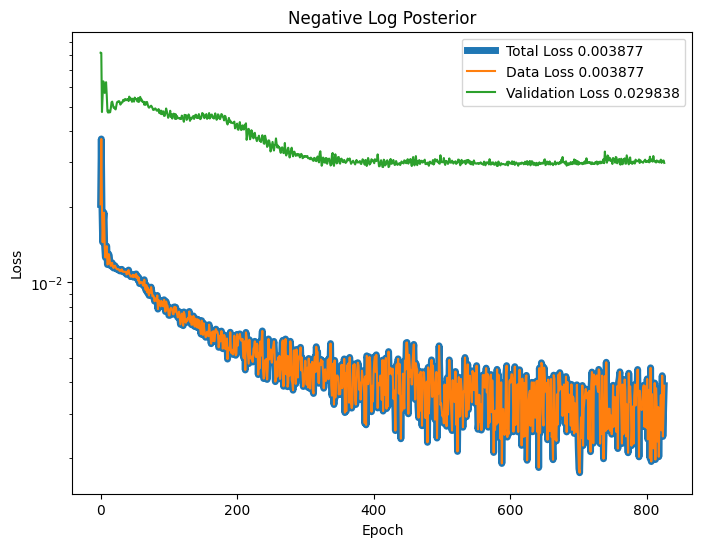

RMSE u: 0.16367285
RMSE v: 0.13642120
RMSE p: 0.12324236


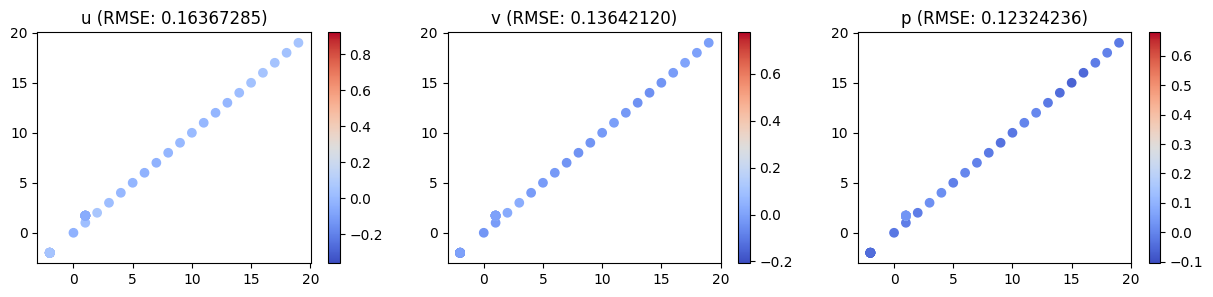

In [14]:
# Print RMSE
model.weights = MAP_weights
model.biases = MAP_biases
U_pred = model.forward(X_tf)
rmse = tf.sqrt(tf.reduce_mean(tf.square(Y_tf - U_pred)))
print("Best epoch at: ", best_epoch)
print(f"RMSE: {rmse.numpy():.8f}")

# Convert loss to anti-log:
print(f"Loss: {(loss.numpy()):.8f}")

# Plot the loss if any of the required loss components are available
plt.figure(figsize=(8, 6))
if loss_all:
    plt.plot(loss_all, linewidth=5, label=f'Total Loss {loss_all[-1].numpy():.6f}')
if loss_all_data:
    plt.plot(loss_all_data, label=f'Data Loss {loss_all_data[-1].numpy():.6f}')
if loss_all_pde:
    plt.plot(loss_all_pde, label=f'PDE Loss {loss_all_pde[-1].numpy():.6f}')
if loss_all_conditions:
    plt.plot(loss_all_conditions, label=f'Conditions Loss {loss_all_conditions[-1].numpy():.6f}')
if val_loss_all:
    plt.plot(val_loss_all, label=f'Validation Loss {val_loss_all[-1].numpy():.6f}')
plt.axhline(y=0, color='b', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Negative Log Posterior")
plt.legend()
plt.yscale('log')
# save the plot
plt.savefig("loss_plot.png")
plt.show()

# Plot the normalised data
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
sc0 = axs[0].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,0] - U_pred[:,0], cmap='coolwarm')
fig.colorbar(sc0, ax=axs[0])
axs[0].set_title('u')
sc1 = axs[1].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,1] - U_pred[:,1], cmap='coolwarm')
fig.colorbar(sc1, ax=axs[1])
axs[1].set_title('v')
sc2 = axs[2].scatter(X_tf[:,0], X_tf[:,1], c=Y_tf[:,2] - U_pred[:,2], cmap='coolwarm')
fig.colorbar(sc2, ax=axs[2])
axs[2].set_title('p')
# Calculate and print RMSE for u, v, p
rmse_u = tf.sqrt(tf.reduce_mean(tf.square(Y_tf[:, 0] - U_pred[:, 0])))
rmse_v = tf.sqrt(tf.reduce_mean(tf.square(Y_tf[:, 1] - U_pred[:, 1])))
rmse_p = tf.sqrt(tf.reduce_mean(tf.square(Y_tf[:, 2] - U_pred[:, 2])))

print(f"RMSE u: {rmse_u.numpy():.8f}")
print(f"RMSE v: {rmse_v.numpy():.8f}")
print(f"RMSE p: {rmse_p.numpy():.8f}")

# Add RMSE to the plot titles
axs[0].set_title(f'u (RMSE: {rmse_u.numpy():.8f})')
axs[1].set_title(f'v (RMSE: {rmse_v.numpy():.8f})')
axs[2].set_title(f'p (RMSE: {rmse_p.numpy():.8f})')
plt.show()
